# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df = pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [10]:
def zerotoone(a):
    if a=='Female':
        return 1
    else:
        return 0
    


In [11]:
df['Gender'] = df['Gender'].apply(zerotoone)

In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [13]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

#### Drop user ID column

In [14]:
df.drop(columns=['User ID'],inplace=True)



In [15]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<AxesSubplot:>

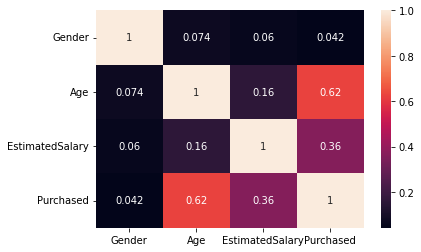

In [17]:
sns.heatmap(df.corr(),annot=True)

### Plot a countplot of gender with respect to purchased

<AxesSubplot:xlabel='Gender', ylabel='count'>

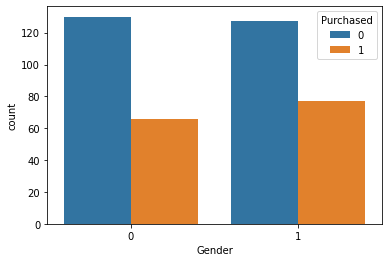

In [18]:
sns.countplot(x=df['Gender'],hue=df['Purchased'])

### Plot a displot of Age

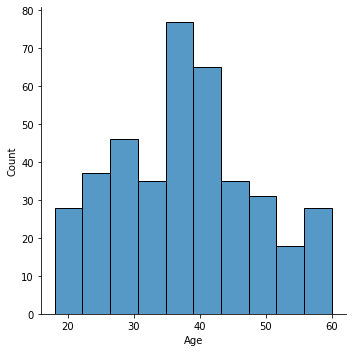

In [19]:
sns.displot(x=df['Age'])

### Plot pairplot of the dataset

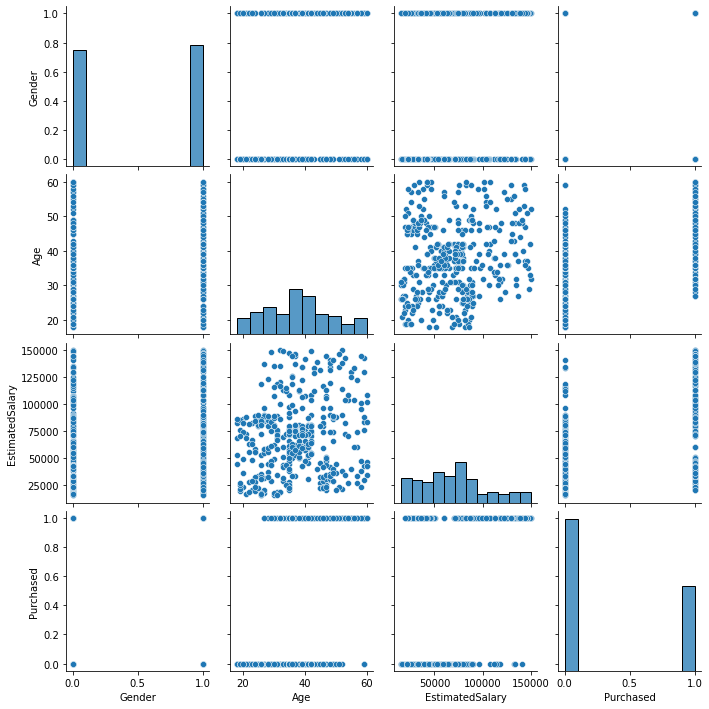

In [20]:
sns.pairplot(df)

## Data Preprocessing

### Split the dataset into input and target variables

In [21]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

### Scale the data using StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
std = StandardScaler()

In [24]:
X = std.fit_transform(x)

In [25]:
X = pd.DataFrame(X,columns=x.columns)

In [26]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [30]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25)

### Check shape of X_train and X_test

In [33]:
xtrain.shape

(300, 3)

In [34]:
xtest.shape

(100, 3)

## ML Models

### Logistic Regression Classifier

In [35]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [36]:
lf = LogisticRegression()

In [37]:
lf.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
lf_pred = lf.predict(xtest)

LogisticRegression()

In [39]:
lf.score(xtrain,ytrain)

0.8633333333333333

In [40]:
metrics.accuracy_score(ytest,lf_pred)

0.84

In [42]:
print(metrics.confusion_matrix(ytest,lf_pred))

print(metrics.classification_report(ytest,lf_pred))

[[57  7]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        64
           1       0.79      0.75      0.77        36

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.84      0.84      0.84       100



In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cross_val_score(lf,X,y,cv=5).mean()

0.82

### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=20)

In [47]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20)

In [48]:
rf.score(xtrain,ytrain)

0.9933333333333333

In [49]:
rf_pred = rf.predict(xtest)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
accuracy_score(ytest,rf_pred)

0.83

In [52]:
print(confusion_matrix(ytest,rf_pred))

[[54 10]
 [ 7 29]]


In [53]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        64
           1       0.74      0.81      0.77        36

    accuracy                           0.83       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



In [54]:
cross_val_score(rf,X,y,cv=5).mean()

0.8474999999999999

### Support Vector Machine

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC()

In [57]:
svc.fit(xtrain,ytrain)

SVC()

In [58]:
svc_pred = svc.predict(xtest)

In [59]:
svc.score(xtrain,ytrain)

0.9233333333333333

In [60]:
accuracy_score(ytest,svc_pred)

0.87

In [61]:
print(confusion_matrix(ytest,svc_pred))

print(classification_report(ytest,svc_pred))

[[57  7]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.81      0.83      0.82        36

    accuracy                           0.87       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100



In [62]:
cross_val_score(svc,X,y,cv=5).mean()

0.9

### Assign cross val scores of all models into a dataframe

In [63]:
Models = {'models':['Logistic Regression','Support Vector CLassifier','Random Forest Classifier'],
          'score':[cross_val_score(lf,X,y,cv=5).mean(),cross_val_score(svc,X,y,cv=5).mean(),cross_val_score(rf,X,y,cv=5).mean()]}

In [64]:
dd = pd.DataFrame.from_dict(Models)

dd

,models,score
0,Logistic Regression,0.820
1,Support Vector CLassifier,0.900
2,Random Forest Classifier,0.855


***

## Deploy the model with highest score using Tkinter

In [75]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [80]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will output to an entry box in Tkinter

In [118]:
def get_prediction():
    gender1 = gender.get()
    age1 = age.get()
    salary1 = salary.get()
    
    
    if gender1 == 'Male':
        gender1 = 0
    else:
        gender1 = 1
        
    X = std.transform([[gender1,age1,salary1]])
    
    prediction = svc.predict(X)
    
    result.delete(0,END)
    
    if prediction[0] == 0:
        result.insert(0,'Not purchased')
    else:
        result.insert(0,'Purchased')

In [119]:
df['Gender'].dtypes

dtype('int64')

### Create Tkinter window with all necessary entryboxes and labels

In [120]:
window = Tk()

window.title('Customer Behaviour Classification')

window.geometry('400x400')

title_label = Label(window,text="Customer Behaviour Classification",font=("Arial Bold", 13)).pack()
Label(window).pack()

g_label = Label(window,text="Gender").pack()
gender = Combobox(window)
gender['values'] = ('Male','Female')
gender.pack()

Label(window).pack()

age_label = Label(window,text='Age').pack()
age = Entry(window)
age.pack()

Label(window).pack()

salary_label = Label(window,text="Salary").pack()
salary = Entry(window)
salary.pack()

Label(window).pack()

button = Button(window,text='Get Prediction',command = get_prediction)
button.pack()

Label(window).pack()

result = Entry(window)
result.pack()

window.mainloop()












***